In [1]:
# pour changer la largeur de la page htlm générée par Jupyter :
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

C:\Users\e2300552\AppData\local\Temp\ipykernel_11852\568132765.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display, HTML


# TP : Exploration et Analyse de Données avec Pandas et Streamlit

## Objectif

Ce projet vise à développer vos compétences en manipulation et analyse de données à l'aide de la bibliothèque Pandas en Python. Vous apprendrez à :

- Importer et explorer des données provenant de Kaggle.
- Effectuer des requêtes et manipulations de type SQL avec Pandas.
- Créer des visualisations interactives avec Streamlit.

Ce projet est noté. Tous les codes devront être écrits en Python dans des champs *jupyter* et devront respecter les conventions de nommage. L'énoncé **ne doit pas être modifié**.

La derniere séance du projet, vous déposerez le fichier jupyter (projetSAE.ipynb) sur la plateforme pédagogique.


##### Procédure à réaliser avant les séances de TD (nous utiliserons désormais jupyter lab)
- Lancer Anaconda Prompt sous Windows
- Saisissez dans Anaconda Prompt : 
conda create -n projet python pandas numpy matplotlib jupyterlab kagglehub seaborn streamlit plotly

=> à la demande "Proceed ([y]/n)?" saisissez y (ou juste pressez sur la touche "entrée")
=> "Executing transaction" prend du temps, c'est normal
Saisissez dans Anaconda Prompt : 
conda activate projet

##### Saisissez dans Anaconda Prompt : 
jupyter lab --notebook-dir="h:/"
Ouvrir projetSAE.ipynb dans Jupyter

In [2]:
%matplotlib notebook
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import streamlit as st

### Partie 1 : importation et exploration des données

#### Travailler avec Git
1 - En utilisant le prompt conda : initialiser le projet 

2 - Ajouter le fichier Jupyter Notebook et faite votre premier commit 
 
3 -  Creer un projet sur github dépôt distant (sans README.md )

4 - Pousser le projet vers ce dépôt 

5 - Enlever les checkpoint de jupyter 

#### Questions
1. Téléchargez le Dataset **Data Science Salaries 2023** sur Kaggle (https://www.kaggle.com/datasets/) via **kagglehub**.
2. Copier le fichier du cache au répertoire du projet, décompresser et visualiser le fichier CSV **ds_salaries.csv**
3. Importez le fichiers CSV avec Pandas.

##### Votre code

In [6]:
%pip install kaggle
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [73]:
import kagglehub

cache_path = kagglehub.dataset_download("arnabchaki/data-science-salaries-2023")

print("Dataset téléchargé dans :", cache_path)

Dataset téléchargé dans : C:\Users\e2300552\.cache\kagglehub\datasets\arnabchaki\data-science-salaries-2023\versions\1


In [77]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "h:\Mes documents\BUT3\vcod\projet_notebook\data"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "arnabchaki/data-science-salaries-2023",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

C:\Users\e2300552\AppData\local\Temp\ipykernel_11852\237609420.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


KaggleApiHTTPError: 404 Client Error.

Resource not found at URL: https://api.kaggle.com/datasets/arnabchaki/data-science-salaries-2023/versions/1
Please make sure you specified the correct resource identifiers.

In [10]:
# Répertoire cible dans votre projet
project_dir = r"h:\Mes documents\BUT3\vcod\projet_notebook\data"

# Chemin du fichier CSV dans le cache
cache_file = os.path.join(cache_path, "ds_salaries.csv")

# Copier le fichier depuis le cache au répertoire du projet
shutil.copy(cache_file, project_dir)

print("Fichier ds_salaries.csv copié dans :", project_dir)

Fichier ds_salaries.csv copié dans : h:\Mes documents\BUT3\vcod\projet_notebook\data


In [12]:
import pandas as pd

# Lire le fichier depuis le répertoire du projet
df = pd.read_csv("data/ds_salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


### Partie 2 : Analyses exploratoires

#### Question 1 :
Nous Souhaitons :

1. Connaitre est ce qu'il y a des données manquantes dans notre dataset.
2. Voir la distribution des salaires en USD avec la bibliothèque seaborn sous fome d'histogramme
3. avoir la liste des pays concerné par l'étude 
4. connaitre les salaire moyen par rôle, par pays, par niveau d'expérience

#### Votre code

In [21]:
#données manquantes 
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Aucune colonne ne présente de valeurs manquantes

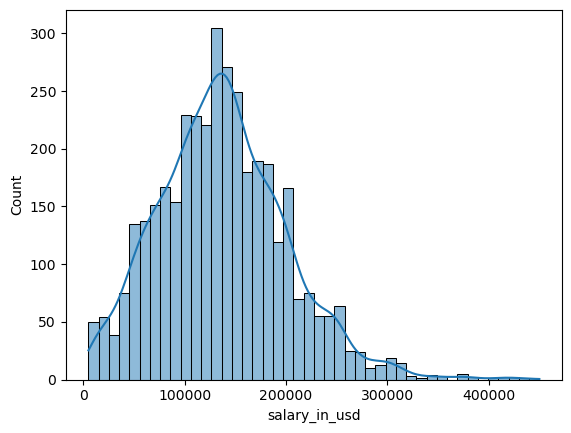

In [46]:
# %matplotlib inline
# Distribution des salaires en USD
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x=df["salary_in_usd"], kde=True)
plt.show()

On peut voir que la colonne "salary_in_usd" semble suivre une distribution de loi gaussienne  
Avec un maximum autour de 150000 USD pour 300 d'effectifs

In [16]:
# liste des pays concerné par l'étude 
liste_pays = df["employee_residence"].unique()
print(liste_pays)
len(liste_pays)

['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'PT' 'NL' 'CH' 'CF' 'FR' 'AU'
 'FI' 'UA' 'IE' 'IL' 'GH' 'AT' 'CO' 'SG' 'SE' 'SI' 'MX' 'UZ' 'BR' 'TH'
 'HR' 'PL' 'KW' 'VN' 'CY' 'AR' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK'
 'IT' 'MA' 'LT' 'BE' 'AS' 'IR' 'HU' 'SK' 'CN' 'CZ' 'CR' 'TR' 'CL' 'PR'
 'DK' 'BO' 'PH' 'DO' 'EG' 'ID' 'AE' 'MY' 'JP' 'EE' 'HN' 'TN' 'RU' 'DZ'
 'IQ' 'BG' 'JE' 'RS' 'NZ' 'MD' 'LU' 'MT']


78

Il y a 78 pays concerné par l'étude

In [24]:
#Salaire moyen par rôle
sal_moy_role = df.groupby("job_title")["salary_in_usd"].mean()
print(sal_moy_role)

# Salaire moyen par pays
sal_moy_pays = (
    df.groupby("employee_residence", as_index=False)["salary_in_usd"]
      .mean()
)
print(sal_moy_pays)

# Salaires moyens par niveau d'expérience
sal_moy_exp = df.groupby("experience_level")["salary_in_usd"].mean()
print(sal_moy_exp)

job_title
3D Computer Vision Researcher     21352.250000
AI Developer                     136666.090909
AI Programmer                     55000.000000
AI Scientist                     110120.875000
Analytics Engineer               152368.631068
                                     ...      
Research Engineer                163108.378378
Research Scientist               161214.195122
Software Data Engineer            62510.000000
Staff Data Analyst                15000.000000
Staff Data Scientist             105000.000000
Name: salary_in_usd, Length: 93, dtype: float64
   employee_residence  salary_in_usd
0                  AE  100000.000000
1                  AM   50000.000000
2                  AR   35500.000000
3                  AS   32777.500000
4                  AT   71125.833333
..                ...            ...
73                 TR   19058.000000
74                 UA   57850.000000
75                 US  152822.011651
76                 UZ  103000.000000
77                

#### Question 2 :
Nous Souhaitons :

1. Filtrer les salaires pour un pays donné (ex : US)
2. Connaitre les top 5 des entreprises qui paient le plus

3. Filtrage et agrégation:
    - Afficher tous les employés dont le salaire est supérieur à 100 000 USD, ainsi que leur rôle.
    - Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
       
4. Requêtes conditionnelles: 
    - Salaire moyen des employés à distance (100%)
    - Comparer salaires moyens pour deux catégories
        
5. Ajouter une colonne pour les fourchettes de salaires
6. Corrélations : Relation entre télétravail et salaire: 
 -
7. Salaire moyen par taille d'entreprise 
8. faire un tableau croisé : Moyenne des salaires par niveau d'expérience et télétravail

In [71]:
# Filtrer les salaires pour un pays donné (ex : US)
df_salaire_USA = df[df["company_location"] == "US"]

In [72]:
# Top 5 des entreprises qui paient le plus
top_5_entreprise_USA = df_salaire_USA.sort_values(by="salary_in_usd", ascending=False).head(5)
print(top_5_entreprise_USA)

      work_year experience_level employment_type  \
3522       2020               MI              FT   
3747       2021               MI              FT   
3675       2021               EX              CT   
3750       2020               SE              FT   
3463       2022               SE              FT   

                               job_title  salary salary_currency  \
3522                  Research Scientist  450000             USD   
3747  Applied Machine Learning Scientist  423000             USD   
3675            Principal Data Scientist  416000             USD   
3750                      Data Scientist  412000             USD   
3463                 Data Analytics Lead  405000             USD   

      salary_in_usd employee_residence  remote_ratio company_location  \
3522         450000                 US             0               US   
3747         423000                 US            50               US   
3675         416000                 US           100       

In [ ]:
Les 5 entreprises qui paient le plus sont américaines 

In [37]:
# Filtrer les données
# Rôles avec un salaire moyen supérieur à 100,000
Salaire_moy_sup_100000 = df[df["salary_in_usd"] > 100000]
print(Salaire_moy_sup_100000["job_title"].unique())
print(Salaire_moy_sup_100000["job_title"].count())

['Data Scientist' 'Applied Scientist' 'Data Analyst' 'Data Modeler'
 'Research Engineer' 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Engineer' 'Computer Vision Engineer'
 'Data Architect' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Data Specialist'
 'Director of Data Science' 'Machine Learning Scientist' 'MLOps Engineer'
 'AI Scientist' 'Lead Data Scientist' 'Cloud Database Engineer'
 'Financial Data Analyst' 'Data Infrastructure Engineer' 'ML Engineer'
 'Data Operations Engineer' 'BI Developer' 'Data Science Lead'
 'Deep Learning Researcher' 'BI Analyst' 'Data Analytics Specialist'
 'Machine Learning Infrastructure Engineer' 'Head of Data Science'
 'Applied Machine Learning Engineer' 'Deep Learning Engineer'
 'Machine Learning Software Engineer' 'Big Data Architect'
 'Big Data Engineer' 'Data Science Consultant' 'Data Lead'
 'Data Science Engine

Il y a 2665 roles différents avec un salaire moyen supérieur à 100 000 USD

In [44]:
# Pays avec la plus forte proportion de télétravail (remote_ratio = 100)
# Compter le nombre total de postes par pays (localisation de l'entreprise)
total_par_pays = df.groupby('company_location').size()

# Filtrer les postes en télétravail complet (remote_ratio = 100)
remote_100 = df[df['remote_ratio'] == 100]

# Compter le nombre de postes à 100% remote par pays
remote_par_pays = remote_100.groupby('company_location').size()

# Calculer la proportion (en pourcentage)
proportion_remote = (remote_par_pays / total_par_pays) * 100

# Nettoyer les valeurs manquantes (pays sans aucun remote 100%) et trier
proportion_remote = proportion_remote.fillna(0).sort_values(ascending=False)

# Afficher le résultat
print("Proportion de télétravail (100%) par pays :")
print(proportion_remote.head(10))

# Pour obtenir le pays spécifique avec la plus forte proportion
pays_max = proportion_remote.idxmax()
valeur_max = proportion_remote.max()

print(f"\nLe pays avec la plus forte proportion de télétravail est {pays_max} avec {valeur_max:.2f}%.")

Proportion de télétravail (100%) par pays :
company_location
AR    100.0
KE    100.0
MY    100.0
NG    100.0
EG    100.0
CR    100.0
CF    100.0
CL    100.0
PH    100.0
PL    100.0
dtype: float64

Le pays avec la plus forte proportion de télétravail est AR avec 100.00%.


Il y a 10 pays qui ont une proportion de télétravail à 100 %

In [63]:
# Requêtes conditionnelles
# Salaire moyen des employés à distance (100%)
print("Le salaire moyen des employés à distance est de", round(remote_100["salary_in_usd"].mean(), 2))

# Comparer salaires moyens pour deux catégories
salaire_moy_categorie = df.groupby("employment_type")["salary_in_usd"].mean()
salaire_moy_categorie

Le salaire moyen des employés à distance est de 136481.45


employment_type
CT    113446.900000
FL     51807.800000
FT    138314.199570
PT     39533.705882
Name: salary_in_usd, dtype: float64

On peut voir qu un travailleur à plein temps (employment_type = FT) gagne 131 000 USD alors qu'un travailleur indépendant (employment_type = FL) gagne 51 000 USD

In [58]:
# Ajouter une colonne pour les fourchettes de salaires
bins = [0, 50000, 100000, 150000, 200000, float("inf")]
labels = [
    "0–50k",
    "50k–100k",
    "100k–150k",
    "150k–200k",
    "200k+"
]

df["salary_range"] = pd.cut(
    df["salary_in_usd"],
    bins=bins,
    labels=labels,
    right=False
)
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_range
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,50k–100k
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,0–50k
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,0–50k
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,150k–200k
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,100k–150k


In [59]:
# Analyse des corrélations
# Relation entre télétravail et salaire
df[["remote_ratio", "salary_in_usd"]].corr()

,remote_ratio,salary_in_usd
remote_ratio,1.000000,-0.064171
salary_in_usd,-0.064171,1.000000


In [ ]:
On peut voir qu il n y a pas de corrélation entre le télétravail et le salaire car la valeur est très proche de 0 (-0.065)

In [60]:
# Salaire moyen par taille d'entreprise
salaire_moy_taille_entreprise = df.groupby("company_size")["salary_in_usd"].mean()
salaire_moy_taille_entreprise

company_size
L    118300.982379
M    143130.548367
S     78226.682432
Name: salary_in_usd, dtype: float64

On peut voir que le salaire moyen dans les petites entreprise (company_size = S) est largement inférieure à celui dans les moyennes et grandes entreprise

In [62]:
# Tableaux croisés
# Moyenne des salaires par niveau d'expérience et télétravail
pivot_table = df.pivot_table(
    index='experience_level', 
    columns='remote_ratio', 
    values='salary_in_usd', 
    aggfunc='mean'
)
print("Tableau croisé des salaires :", pivot_table)

Tableau croisé des salaires : remote_ratio                0              50             100
experience_level                                             
EN                104581.765766   64006.230769   65040.486111
EX                182435.785714  139030.166667  214837.326923
MI                116723.103535   74214.405405   96803.480597
SE                154024.064706   98438.136364  154022.023381
